In [1]:
import os

import pandas as pd
import seaborn as sns

In [2]:
df_results = pd.DataFrame()
for f in [f for f in os.listdir('../results/') if 'cnn' in f]:
    df_results = pd.concat((df_results,pd.read_csv(f'../results/{f}')))

df_results.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df_results

,epoch,test_losses,train_losses,test_accuracies,train_accuracies,train_percentage,synth_percentage,transform,sim_num,category
0,0,0.907579,0.974931,0.561719,0.530078,0.8,0.2,basic,0,basic_0.8_0.2
1,1,0.859766,0.881066,0.603906,0.578711,0.8,0.2,basic,0,basic_0.8_0.2
2,2,0.651922,0.752591,0.710938,0.647852,0.8,0.2,basic,0,basic_0.8_0.2
3,3,0.570493,0.549344,0.751563,0.760352,0.8,0.2,basic,0,basic_0.8_0.2
4,4,0.430939,0.391413,0.834375,0.834766,0.8,0.2,basic,0,basic_0.8_0.2
...,...,...,...,...,...,...,...,...,...,...
95,5,0.514195,0.845274,0.779687,0.605664,0.8,0.2,auto,9,auto_0.8_0.2
96,6,0.448738,0.778808,0.808594,0.637109,0.8,0.2,auto,9,auto_0.8_0.2
97,7,0.363067,0.755613,0.853906,0.641406,0.8,0.2,auto,9,auto_0.8_0.2
98,8,0.338381,0.709294,0.862500,0.668945,0.8,0.2,auto,9,auto_0.8_0.2


<Axes: xlabel='epoch', ylabel='test_losses'>

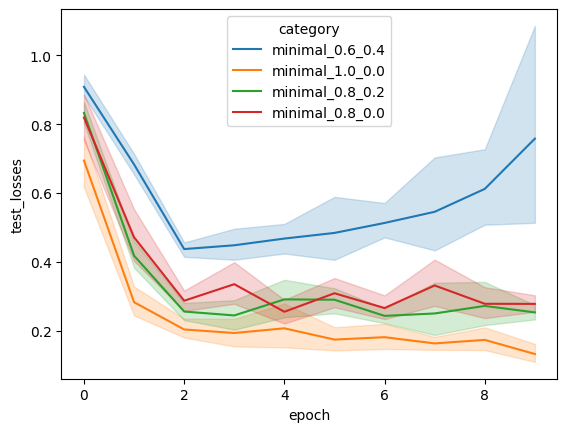

In [4]:
sns.lineplot(
    data=df_results[df_results['category'].isin(
        [
            'minimal_1.0_0.0',
            'minimal_0.8_0.2',
            'minimal_0.8_0.0',
            'minimal_0.6_0.4',
        ])],
    x='epoch',
    y='test_losses',
    hue='category'
)
